## Import Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from clean import CleanData
import seaborn as sns
import json
from googletrans import Translator
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime, timedelta

## Tobie Code

In [26]:
df = pd.read_csv("new_dfm.csv")

In [27]:
df["translated_lang"].value_counts().head(20)


original sound                                   353
Original sound                                    27
Original sound.                                   20
as original                                       19
Therefore I Am                                     8
Original                                           6
Oh No                                              5
The original sound                                 5
Potential Breakup Song                             4
WITHOUT YOU                                        4
Where Is The Love?                                 4
Original Sound                                     4
What You Know Bout Love                            3
They are original                                  3
Pilfingerdansen - Remix                            3
ruin our friendship                                3
positions                                          2
BILLIE JEAN X BOO X F IT UP VMESHBEATS MASHUP      2
Rocky: Eye of the Tiger                       

In [28]:
df["translated_lang"] = df["translated_lang"].astype(
    str)
df["translated_lang"] = df["translated_lang"].apply(
    lambda x: x.lower())


In [29]:
df["translated_lang"].value_counts().head(20).sum()

698

In [7]:
df["original_sound"] = df["translated_lang"].apply(lambda x: True if "original" in  x else False)

In [8]:
df["first_audio"] = df["musicMeta.musicOriginal"]


In [9]:
df[["first_audio","original_sound", "likeRate"]].groupby(
    ["first_audio", "original_sound"]).mean().sort_values(by="likeRate", ascending=False)


likeRate
first_audio original_sound          
1           False           0.106613
            True            0.101524
0           False           0.087618
            True            0.075364

In [10]:
df["original_sound"].value_counts()

False    546
True     454
Name: original_sound, dtype: int64

## Mattheus Code


In [18]:
data = json.load(open('./data/trending.json', encoding="utf8"))
data = data['collector']
toParse = pd.json_normalize(data)
df = CleanData(toParse)
df.process_the_data()
df.summary_of_data()
df_clean = df.dfm
# df_clean.info()
df_clean.columns

Missing Data:
None

Data Time Period:
Start Date: 2020-09-22 14:22:38
  End Date: 2020-12-21 03:18:36
 Timedelta: 89 days 12:55:58


Index(['id', 'text', 'createTime', 'webVideoUrl', 'likeCount', 'shareCount',
       'playCount', 'commentCount', 'downloaded', 'mentions', 'hashtags',
       'authorMeta.id', 'authorMeta.secUid', 'authorMeta.name',
       'authorMeta.nickName', 'authorMeta.verified', 'authorMeta.signature',
       'authorMeta.avatar', 'musicMeta.musicId', 'musicMeta.musicName',
       'musicMeta.musicAuthor', 'musicMeta.musicOriginal', 'musicMeta.playUrl',
       'musicMeta.coverThumb', 'musicMeta.coverMedium', 'musicMeta.coverLarge',
       'covers.default', 'covers.origin', 'covers.dynamic', 'videoMeta.height',
       'videoMeta.width', 'videoMeta.duration', 'shareRate', 'likeRate',
       'commentRate'],
      dtype='object')

In [19]:
df_clean['musicMeta.musicName']

0                                 Element
1                              Without Me
2                 Pilfingerdansen - Remix
3             Justin Timberlake - Mirrors
4                                      原聲
                      ...                
995                        original sound
996                        original sound
997                      origineel geluid
998    Imagine having long beautiful hair
999                Potential Breakup Song
Name: musicMeta.musicName, Length: 1000, dtype: object

In [ ]:

translator = Translator()

translated_lang = []
for ind,row in  df_clean.iterrows():
    try:
        _lang = translator.translate(row["musicMeta.musicName"]).text
        translated_lang.append(_lang)
        print(f"{ind}:{_lang}")
        
    except Exception:
        translated_lang.append(None)
    

df_clean["translated_lang"] = translated_lang
print("finished")

In [11]:
def plot_bar(ax1, response, response_label, edgecolors, area_color1, area_color2, alpha, legend=False, spines=False, xaxis=False):
    x = avg_df['videoMeta.duration']
    y = avg_df[response]
    ax1.set_xticks(np.arange(min(x), max(x)+1, 1))
    ax1.set_xticklabels([''] * len(np.arange(min(x), max(x)+1, 1)))
    # ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
    # ax1.set_yticks(np.arange(0, max(y)+0.0005, 0.001))
    ax1.set_ylim([min(y),max(y)+0.001])

    x = avg_df[avg_df['authorMeta.verified'] == False]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == False][response]

    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)

    ax1.bar(x,y,color='green',alpha=alpha)
    # l1 = ax1.fill_between(x,y, color=area_color1,alpha=alpha)

    x = avg_df[avg_df['authorMeta.verified'] == True]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == True][response]

    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)

    ax1.bar(x,y,color='blue',alpha=alpha)
    # l2 = ax1.fill_between(x,y,color=area_color2,alpha=alpha)    
    
    # if legend == True:
    #     ax1.legend(handles=[l1,l2], labels=['Not Verified','Verified'], edgecolor='black')

    # ax1.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 20})
    ax1.set_ylabel(f'{response_label}', fontdict={'fontsize': 14})
    # ax1.set_title(f'Distribution of {response_label}', fontdict={'fontsize': 25})
    
    if spines == True:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
    
    if xaxis == True:
        ax1.spines['bottom'].set_visible(False)

    ax1.tick_params(axis='both', which='major', labelsize=12.5)

In [13]:
df = pd.read_csv("new_dfm.csv")

In [17]:
df["translated_lang"] = df["translated_lang"].astype(
    str)
df["translated_lang"] = df["translated_lang"].apply(
    lambda x: x.lower())
df["original_sound"] = df["translated_lang"].apply(lambda x: True if "original" in  x else False)
df["first_audio"] = df["musicMeta.musicOriginal"]

filter_df = df[["first_audio","original_sound",'shareRate','likeRate','commentRate']]
filter_df.loc[:,'first_audio'] = filter_df.loc[:,'first_audio'].replace(1,True).replace(0,False)

pivot_df = filter_df.groupby(['first_audio','original_sound'],as_index=False).size().rename(columns={"size": "videos_count"})
agg_df = filter_df.groupby(['first_audio','original_sound'],as_index=False).agg([np.mean])
pivot_df['avg_share_rate'] = agg_df.reset_index()['shareRate'][['mean']]
pivot_df['avg_like_rate'] = agg_df.reset_index()['likeRate'][['mean']]
pivot_df['avg_comment_rate'] = agg_df.reset_index()['commentRate'][['mean']]
pivot_df

C:\Users\Mattheus\anaconda3\envs\smm635\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,first_audio,original_sound,videos_count,avg_share_rate,avg_like_rate,avg_comment_rate
0,False,False,249,0.002022,0.087618,0.002088
1,False,True,5,0.000527,0.075364,0.001662
2,True,False,297,0.002086,0.106613,0.002209
3,True,True,449,0.002417,0.101524,0.002816


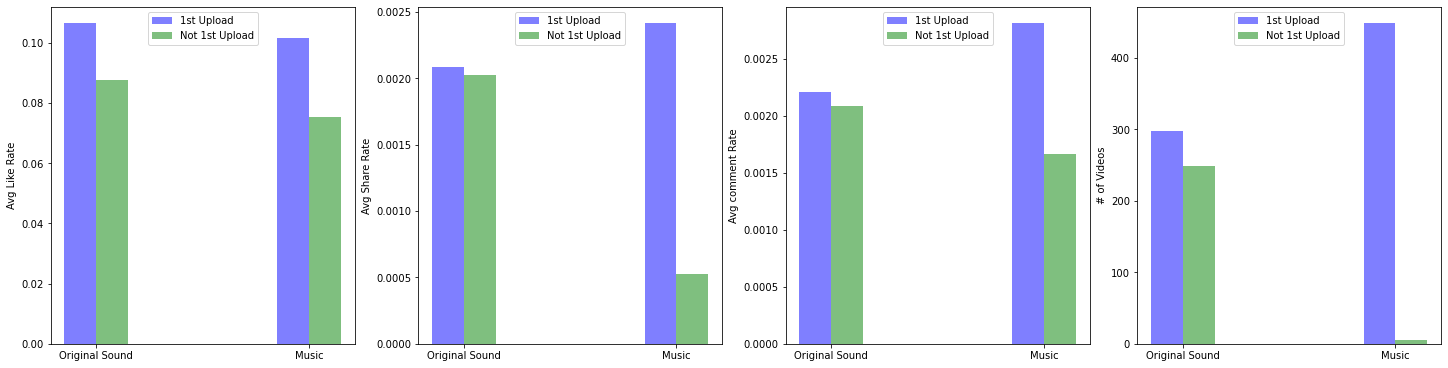

In [13]:
fig = plt.figure(figsize=(20,5),constrained_layout=True)
# fig.suptitle('Music and 1st ppload factors against metrics', fontsize=10)
alpha=0.5
ind = np.arange(2) # the x locations for the groups
width = 0.15       # the width of the bars
ax1 = fig.add_subplot(141)
response = 'avg_like_rate'

x = clean_df[clean_df['first_audio'] == 'True']['original_sound']
y = clean_df[clean_df['first_audio'] == 'True'][response]
bar1 = ax1.bar(ind, y, width, color='blue',alpha=alpha)

x = clean_df[clean_df['first_audio'] == 'False']['original_sound']
y = clean_df[clean_df['first_audio'] == 'False'][response]
bar2 = ax1.bar(ind + width, y, width, color='green',alpha=alpha)

ax1.set_ylabel('Avg Like Rate')
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(('Original Sound', 'Music'))

ax1.legend((bar1[0], bar2[0]), ('1st Upload', 'Not 1st Upload'), loc='upper center')

ax2 = fig.add_subplot(142)
response = 'avg_share_rate'

x = clean_df[clean_df['first_audio'] == 'True']['original_sound']
y = clean_df[clean_df['first_audio'] == 'True'][response]
bar1 = ax2.bar(ind, y, width, color='blue',alpha=alpha)

x = clean_df[clean_df['first_audio'] == 'False']['original_sound']
y = clean_df[clean_df['first_audio'] == 'False'][response]
bar2 = ax2.bar(ind + width, y, width, color='green',alpha=alpha)

ax2.set_ylabel('Avg Share Rate')
ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels(('Original Sound', 'Music'))

ax2.legend((bar1[0], bar2[0]), ('1st Upload', 'Not 1st Upload'), loc='upper center')

ax3 = fig.add_subplot(143)
response = 'avg_comment_rate'

x = clean_df[clean_df['first_audio'] == 'True']['original_sound']
y = clean_df[clean_df['first_audio'] == 'True'][response]
bar1 = ax3.bar(ind, y, width, color='blue',alpha=alpha)

x = clean_df[clean_df['first_audio'] == 'False']['original_sound']
y = clean_df[clean_df['first_audio'] == 'False'][response]
bar2 = ax3.bar(ind + width, y, width, color='green',alpha=alpha)

ax3.set_ylabel('Avg comment Rate')
ax3.set_xticks(ind + width / 2)
ax3.set_xticklabels(('Original Sound', 'Music'))

ax3.legend((bar1[0], bar2[0]), ('1st Upload', 'Not 1st Upload'), loc='upper center')

ax4 = fig.add_subplot(144)
response = 'videos_count'

x = clean_df[clean_df['first_audio'] == 'True']['original_sound']
y = clean_df[clean_df['first_audio'] == 'True'][response]
bar1 = ax4.bar(ind, y, width, color='blue',alpha=alpha)
    
x = clean_df[clean_df['first_audio'] == 'False']['original_sound']
y = clean_df[clean_df['first_audio'] == 'False'][response]
bar2 = ax4.bar(ind + width, y, width, color='green',alpha=alpha)

ax4.set_ylabel('# of Videos')
ax4.set_xticks(ind + width / 2)
ax4.set_xticklabels(('Original Sound', 'Music'))

ax4.legend((bar1[0], bar2[0]), ('1st Upload', 'Not 1st Upload'), loc='upper center')

plt.show()

In [14]:
x = list(clean_df[clean_df['first_audio'] == 'True']['original_sound'].reset_index(drop=True))
y = list(clean_df[clean_df['first_audio'] == 'True'][response].reset_index(drop=True))
x

[False, True]

In [15]:
ind = np.arange(2)
ind

array([0, 1])

In [36]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_audio       4 non-null      bool   
 1   original_sound    4 non-null      bool   
 2   videos_count      4 non-null      int64  
 3   avg_share_rate    4 non-null      float64
 4   avg_like_rate     4 non-null      float64
 5   avg_comment_rate  4 non-null      float64
dtypes: bool(2), float64(3), int64(1)
memory usage: 264.0 bytes


In [51]:
like_tt = clean_df[(clean_df['original_sound'] == True) & (clean_df['first_audio'] == True)]['avg_like_rate']
like_tf = clean_df[(clean_df['original_sound'] == True) & (clean_df['first_audio'] == False)]['avg_like_rate']
like_ft = clean_df[(clean_df['original_sound'] == False) & (clean_df['first_audio'] == True)]['avg_like_rate']
like_ff = clean_df[(clean_df['original_sound'] == False) & (clean_df['first_audio'] == False)]['avg_like_rate']

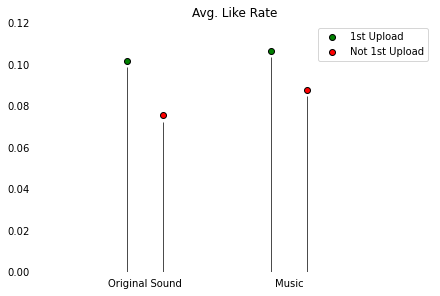

In [112]:
# figure
fig = plt.figure(figsize=(6, 4), constrained_layout=True)

# add plot
ax = fig.add_subplot(111)

x = np.arange(11)
y1 = [-5,-5]+[like_tt]+[-5,-5,-5]+[like_ft]+[-5,-5,-5,-5]
y2 = [-5,-5,-5]+[like_tf]+[-5,-5,-5]+[like_ff]+[-5,-5,-5]

v_offset = 0.003
height1 = [like_tt-v_offset,like_ft-v_offset]
height2 = [like_tf-v_offset,like_ff-v_offset]
# plot data
ax.scatter(x, y1, marker='o', color='green',edgecolor='k')
ax.scatter(x, y2, marker='o', color='red',edgecolor='k')
ax.legend(labels=['1st Upload','Not 1st Upload'],loc='upper right',fontsize=10)
ax.vlines(x=[2,6], ymin=0, ymax=height1, color='green',
          alpha=0.7, linewidth=1, edgecolor='k')
ax.vlines(x=[3,7], ymin=0, ymax=height2, color='red',
          alpha=0.7, linewidth=1, edgecolor='k')

# hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_ylim(0,0.12)
ax.tick_params(bottom=False, left=False)
ax.set_xticks(np.arange(0, 10, 0.5))
# ax.set_xticklabels(ax.get_xticks(),rotation=90) #5,7 14,16
ax.set_xticklabels(['','','','','','Original Sound','','','','','','','','Music','','','','','',''])

# title
plt.title(r'Avg. Like Rate')
plt.show()

<ipython-input-105-8c706270a344>:16: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y2, marker='x', color='k',edgecolor='w')


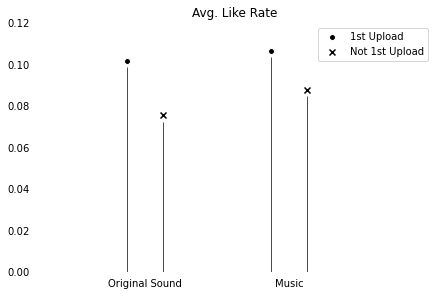

In [105]:
# figure
fig = plt.figure(figsize=(6, 4), constrained_layout=True)

# add plot
ax = fig.add_subplot(111)

x = np.arange(11)
y1 = [-5,-5]+[like_tt]+[-5,-5,-5]+[like_ft]+[-5,-5,-5,-5]
y2 = [-5,-5,-5]+[like_tf]+[-5,-5,-5]+[like_ff]+[-5,-5,-5]

v_offset = 0.003
height1 = [like_tt-v_offset,like_ft-v_offset]
height2 = [like_tf-v_offset,like_ff-v_offset]
# plot data
ax.scatter(x, y1, marker='o', color='k',edgecolor='w')
ax.scatter(x, y2, marker='x', color='k',edgecolor='w')
ax.legend(labels=['1st Upload','Not 1st Upload'],loc='upper right',fontsize=10)
ax.vlines(x=[2,6], ymin=0, ymax=height1, color='k',
          alpha=0.7, linewidth=1)
ax.vlines(x=[3,7], ymin=0, ymax=height2, color='k',
          alpha=0.7, linewidth=1)

# hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_ylim(0,0.12)
ax.tick_params(bottom=False, left=False)
ax.set_xticks(np.arange(0, 10, 0.5))
# ax.set_xticklabels(ax.get_xticks(),rotation=90) #5,7 14,16
ax.set_xticklabels(['','','','','','Original Sound','','','','','','','','Music','','','','','',''])

# title
plt.title(r'Avg. Like Rate')
plt.show()